# Week 10: Advanced Visualization in R Code

---

## Importing/Installing Libraries

To begin let us start by loading (and installing if necessary) the required libraries needed for this notebook. Each of them adds a bit of enhanced functionality to base R which will allow us to create more substantial and interesting visualizations for our data. The libraries required, and a short summary of each of their purposes is shown below:

- Tidyverse: This library is one of the most used R libraries for data manipulation. Packaged with DPLYR, Readr and GGplot2 included, Tidyverse will provide use with much more concise and meaningful syntax for altering and manipulating our data frames. 
- CorrelationFunnnel: Adds interactive plots of correlation visualization for easier and enhanced exploratory data analysis.
- DataExplorer: This library provides several functions that aid in data preprocessing as well as visualization of missing data, memory allocations, and dataset statistics. 
- WVPlots: This library provides several common plots for data and error analysis.
- GGthemes: This library extends the choices of style themes for ggplot2 offering a wide selection of choices for our existing visualizations. 
- Corrplot: This library is used to generate a heat mapped correlation matrix.
- ROCR: This library is used to visualize Receiver Operating Characteristic (ROC) curves as well as other related visualizations of classifiers. 
- Caret: This library stands for Classification and Regression Training and contains functionality for several tree models as well as preprocessing and helper functions.
- e1070: This library is needed as a dependency for caret, so we won't be exploring any in-depth functionality of it specifically, but it is generally filled with several machine learning helper functions. 

After importing all these libraries, you may still see some warning messages displayed which are harmless so you can re-run the cell to hide them.


In [2]:
library(readr)
library(tidyverse)
library(correlationfunnel)
library(DataExplorer)
library(WVPlots)
library(ggthemes)
library(corrplot)
library(ROCR)
library(caret)
library(reshape2)
library(e1071)

---

## Loading & Displaying Data:
First, let us load the 'loans.csv' dataset which we will be using throughout this lesson as the subject of our data visualizations. Note here that we will also need to change the 'default' column to factor for ease in plotting by using the 'as.factor()' function. Each visualization we use will aid us in working towards our ultimate goal which is to use a logistic regression model on a select number of independent variables within the loan dataset to predict the dependent variable 'default'.

In [3]:
dataset <- read.csv('loans.csv')
dataset <- dataset %>% mutate(Default = as.factor(Default))
dataset$Default = as.factor(dataset$Default)

Next, let us take a first glance at the data before we start to construct a model. First, let’s take a look at the first 5 rows by using the 'head()' function.

In [4]:
head(dataset)

Default loan_amnt emp_length home_ownership acc_open_past_24mths annual_inc
1 0        6400     10+ years  MORTGAGE       5                    69500     
2 0        5000     10+ years  RENT           6                    84000     
3 0        5000     8 years    MORTGAGE       2                    36000     
4 0       35000     < 1 year   MORTGAGE       1                    85000     
5 0       10000     10+ years  MORTGAGE       2                    75000     
6 0        5700     6 years    RENT           4                    63000     
  avg_cur_bal bc_open_to_buy bc_util dti   tot_cur_bal tot_hi_cred_lim
1  8925        4425          77.1    13.66 196357      223379         
2  3383        5633          84.5    27.76  64280       77469         
3 14615       18564          65.3    30.03 160767      204100         
4 48028        4583          87.1    18.75 240139      279478         
5 20529        4644          33.7    21.74 143701      213507         
6  1690        3534          60.7    14.53  21972       48508         
  total_acc total_bal_ex_mort total_bc_limit total_il_high_credit_limit
1 36        45990             19300          40279                     
2 34        64280             36400          34969                     
3 22        36867             53500              0                     
4 16        49419             35600          37101                     
5 22        21616              7000          41135                     
6 22        21972              9000          26008                     
  total_rev_hi_lim
1 24800           
2 42500           
3 69100           
4 35600           
5 11200           
6 22500

---


## Analyze Dataset Structure and Meaning:

This dataset is provided by Lending Club and covers information related to several observations/outcomes of various loans made to several individuals over the time period of Q1 2018 to Q4 2018. A description of each variable is provided below.

- Default: Dependent variable, binary valued. Whether the given observation was a loan that ended in default.
- Loan_amnt: Independent variable, integer valued. Initial loan amount (principal) in USD.
- Emp_length: Independent variable, categorical valued, possible values (<1 year,2 years, 3 years, 4 years, 5 years, 6 years, 7 years, 8 years, 9 years, 10+ years). Number of years loan recipient has been consistently employed.
- Home_ownership: Independent variable, categorical valued, possible values (MORTGAGE, RENT, OWN, OTHER, NONE, ANY). Indicates the home ownership status of the loan recipient. 
- Acc_open_past_24mths: Independent variable, integer valued. Number of open credit accounts in the loan reciepients name over the past 24 months.
- Annual_inc: Independent variable, integer valued. Loan recipients reported annual income in USD.
- Avg_cur_bal: Independent variable, integer valued. Loan recipients' average credit balance across all open accounts over the last 24 months.
- Bc_open_to_buy: Independent variable, integer valued. Total open available credit to buy on revolving bankcards.
- Bc_util: Independent variable, floating point valued. Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- Dti: Independent variable, floating point valued. A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income.
- Tot_cur_bal: Independent variable, integer valued. Total current outstanding credit balances across all open accounts.
- tot_hi_cerd_lim: Independent variable, integer valued. Total high credit limit across all open accounts.
- total_acc: Independent variable, integer valued. The total number of credit lines currently in the borrower's credit file.
- total_bal_ex_mort: Independent variable, integer valued. Total credit balance excluding mortgage.
- total_bc_limit: Independent variable, integer valued, Total bankcard high credit/credit limit.
- total_il_high_credit_limit: Independent variable, integer valued. Total installment high credit/credit limit
- total_rev_hi_lim: Independent variable, integer valued. Total high credit limit of any open credit revolver lines.


Now let us also look at some underlying data statistics. This can be accomplished easily by using the 'summary()' function.

In [5]:
summary(dataset)

 Default      loan_amnt      emp_length        home_ownership    
 0:281702   Min.   :  500   Length:323889      Length:323889     
 1: 42187   1st Qu.: 6625   Class :character   Class :character  
            Median :10000   Mode  :character   Mode  :character  
            Mean   :12248                                        
            3rd Qu.:16000                                        
            Max.   :35000                                        
                                                                 
 acc_open_past_24mths   annual_inc       avg_cur_bal     bc_open_to_buy  
 Min.   : 0.000       Min.   :   3000   Min.   :     0   Min.   :     0  
 1st Qu.: 2.000       1st Qu.:  42000   1st Qu.:  2717   1st Qu.:  1067  
 Median : 4.000       Median :  60000   Median :  6338   Median :  3500  
 Mean   : 4.148       Mean   :  71051   Mean   : 12647   Mean   :  8346  
 3rd Qu.: 6.000       3rd Qu.:  85000   3rd Qu.: 17648   3rd Qu.:  9654  
 Max.   :53.000       Max.  

---


## Using DataWrangler Plots:

DataWrangler is a popular R package that allows us to quickly generate meaningful summary plot for large datasets. 

### Plot_Missing():

Now that we have a better understanding of the structure, shape, and characteristics of our dataset let us move onto another key area to address in pre-processing, the identification and handling of missing values. For predictive analytics it is useful to ensure the dataset is complete, or largely complete. The simplest initial step is to check for missing values and then deal with them accordingly. Models can suffer greatly due to missing data; especially regression-based models. We can easily check this with a quick visualization using the 'plot_missing()' function provided in the DataExplorer library, and has the following general syntax:

In [6]:
#?plot_missing()

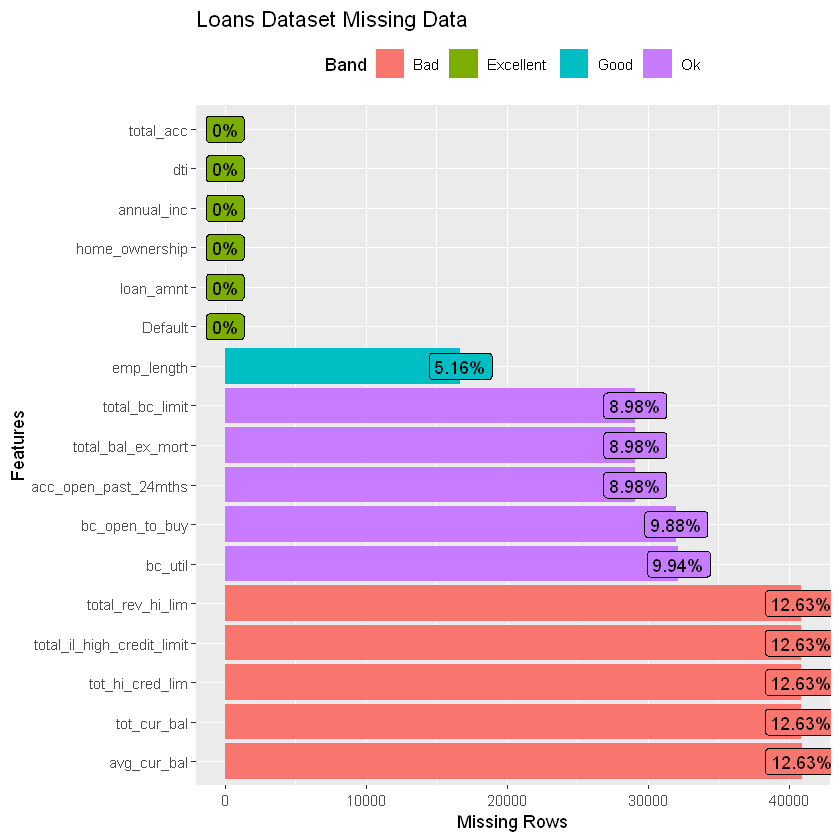

In [7]:
plot_missing(dataset,
             title='Loans Dataset Missing Data',
             group=list("Excellent" = 0.0, "Good" = .06, "Ok" = .1, "Bad" = .15),
             theme_config = list(legend.position = c("top")))

Now that we have a better picture of where we have a large number of missing or NA's in our dataset let’s move onto fixing first by removing the NAs from the column 'avg_cur_bal' using the 'dropna()' function. We first start with a single column because there may be some correlation among columns with missing values so removing rows based on the value of a single column may eliminate missing example from other columns as well which we can further visualize again with 'plot_missing()'.

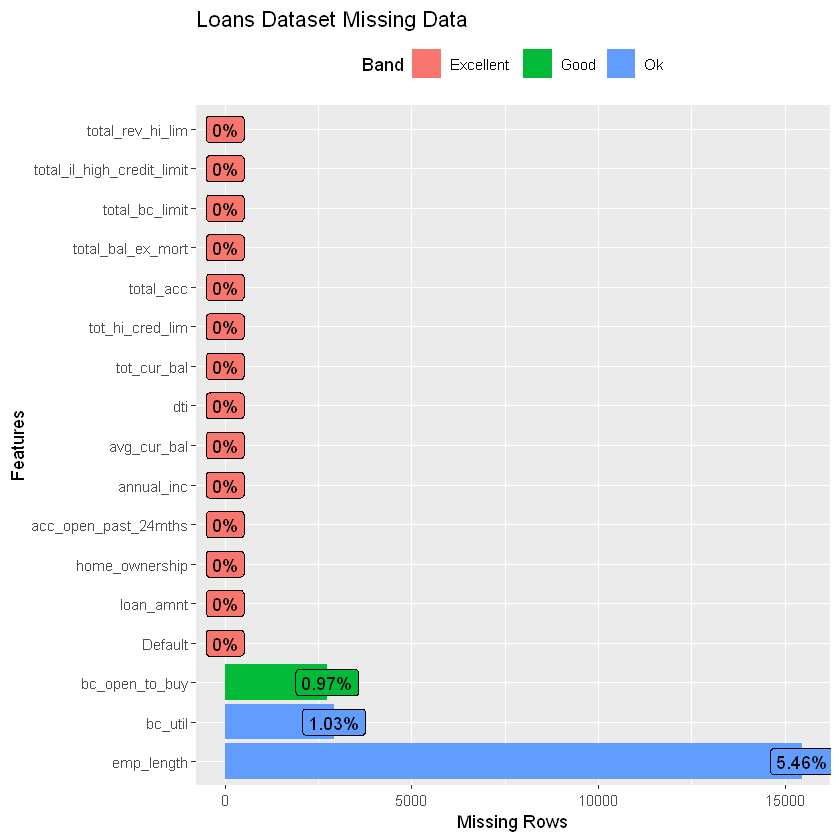

In [8]:
dataset <- dataset %>% drop_na("avg_cur_bal")
plot_missing(dataset,
             title='Loans Dataset Missing Data',
             group=list("Excellent" = 0.0, "Good" = .01, "Ok" = .06, "Bad" = .15),
             theme_config = list(legend.position = c("top")))

As we can see from the plot above, by removing rows with the value of NA by looking at only a single column solved majority of all other missing observations in the other columns. This should indicate that majority of our missing data was missing for several columns in a single row thus they indeed should be dropped. To finish our missing data cleaning we apply the 'dropna()'function once more on the two remaining columns with missing data and plot the results to verify all rows with missing data have been removed. 

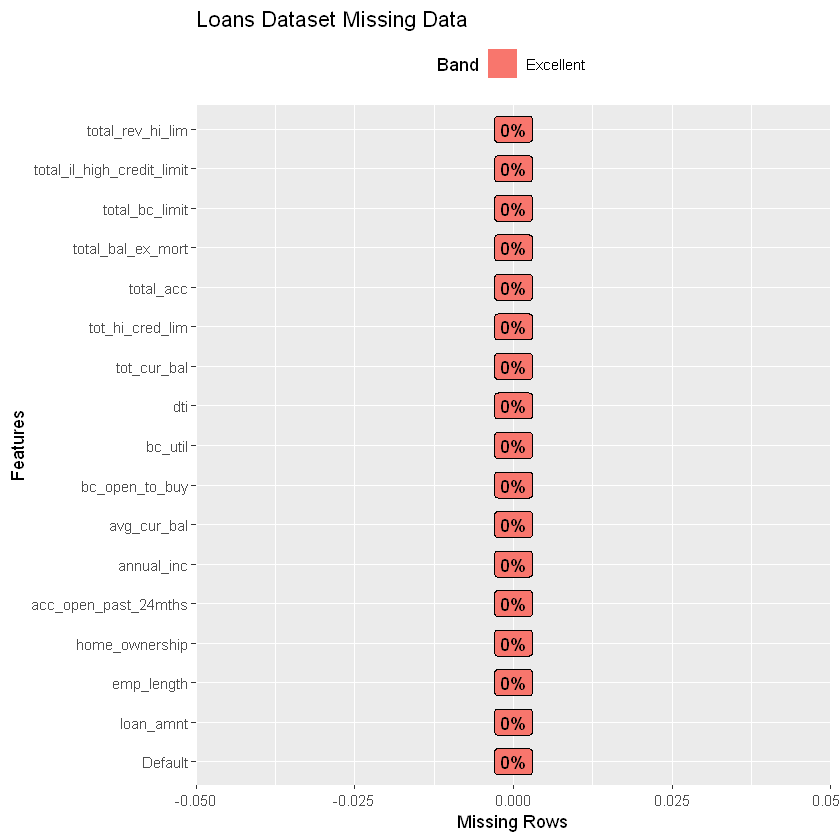

In [9]:
dataset <- dataset %>% drop_na("emp_length")%>% drop_na("bc_util")
plot_missing(dataset,
             title='Loans Dataset Missing Data',
             group=list("Excellent" = 0.0, "Good" = .01, "Ok" = .06, "Bad" = .15),
             theme_config = list(legend.position = c("top")))

As expected, the plot above shows that we have removed all missing values from the rows of our dataset. 


---


### Plot_Histogram():

Next, we want to get a better picture of the data's underlying statistics we previously used the 'summary()' function to do this, but this time let’s use the 'plot_historgram()' function provided in the DataExplorer library to get a better visual picture of these statistics and feature distributions. The 'plot_historgram()' function takes the following syntax:

In [10]:
#?plot_histogram()

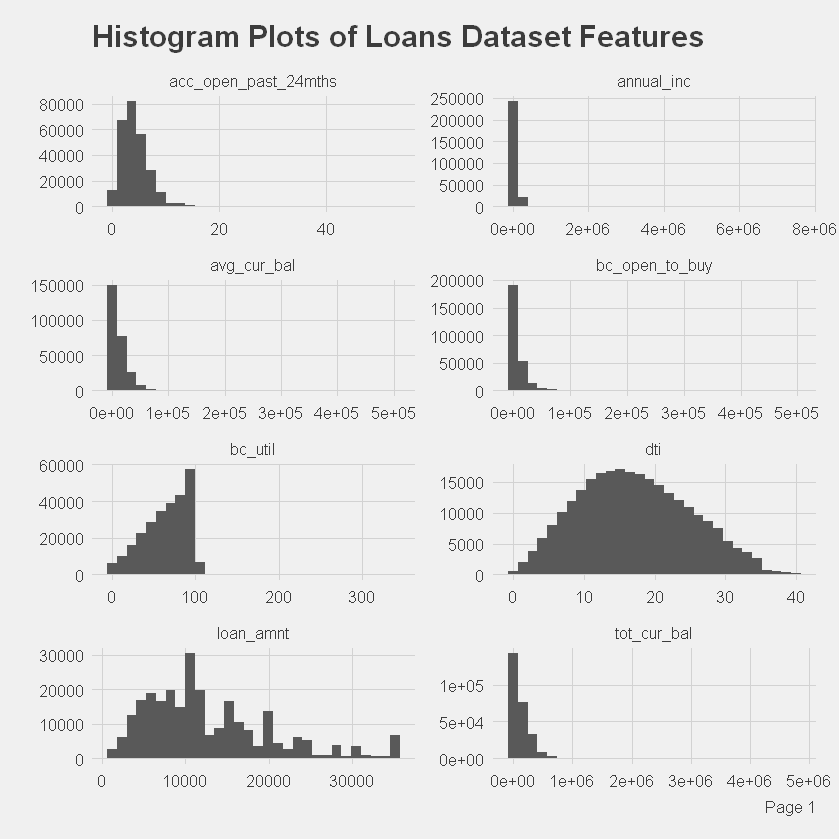

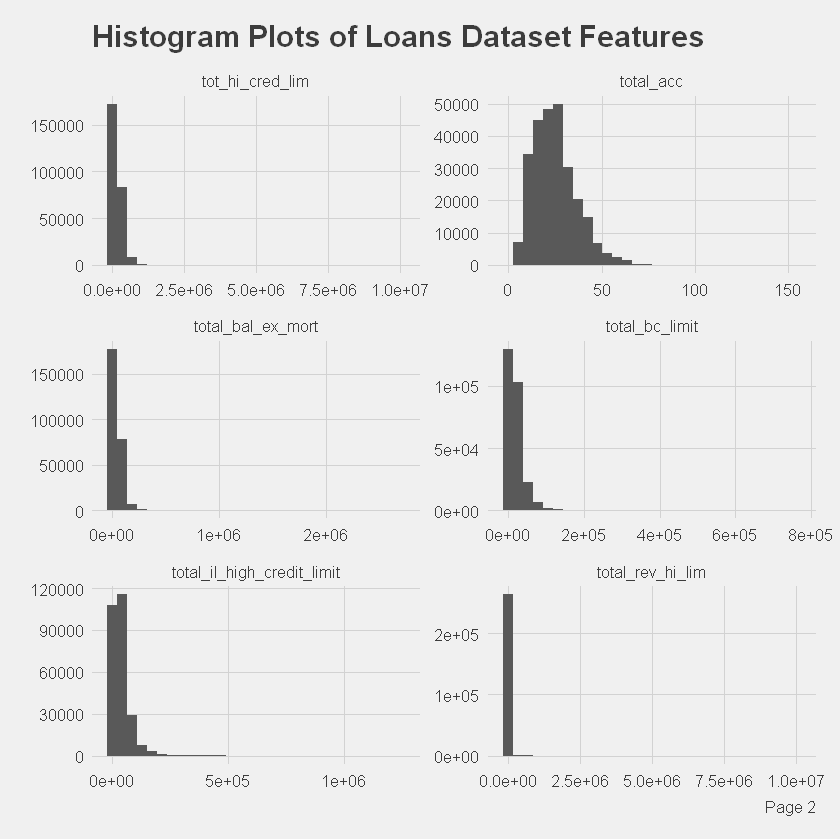

In [11]:
plot_histogram(dataset,
               ggtheme = theme_fivethirtyeight(),
               title='Histogram Plots of Loans Dataset Features',
               ncol=2,
               nrow=4)

---


### Plot_bar():
For categorical variables, it is more suitable to plot bar charts. This can again be done by 2 ways: Using the DataExplorer function 'plot_bar()' to automatically generate them for the categorical variables. This function takes the following syntax:

In [12]:
#?plot_bar()

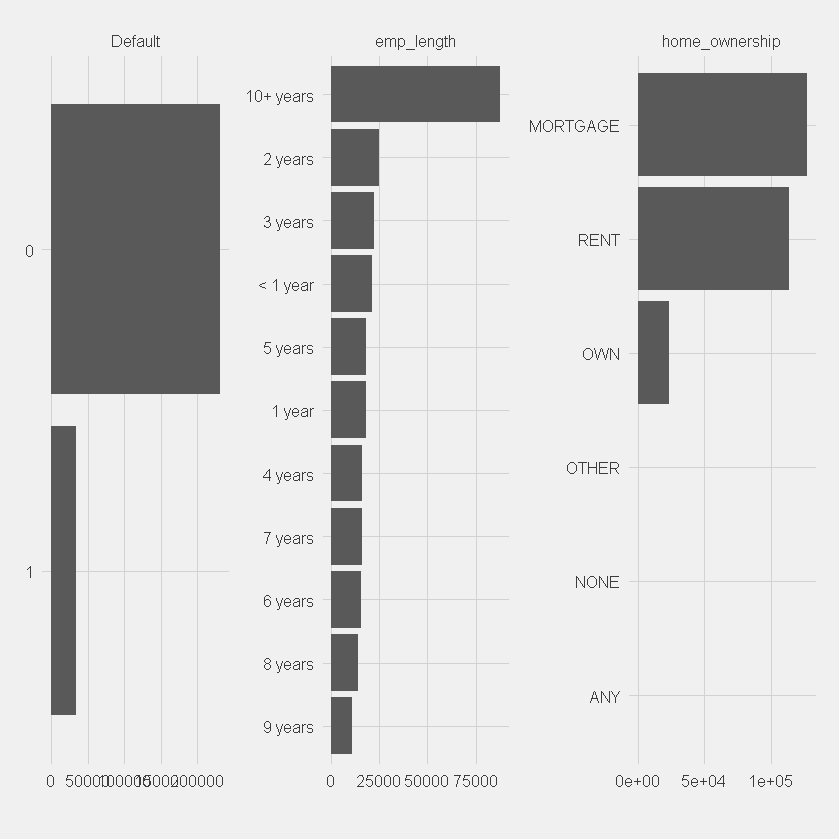

In [13]:
plot_bar(dataset, ggtheme = theme_fivethirtyeight())

---


### Plot_boxplot():
We can also use the handy 'plot_boxplot()' to plot all of our data feature with respect to a specified y value. In this case we wish to analyze with respect to our labels the Default feature so we apply the following:


In [14]:
#?plot_boxplot()

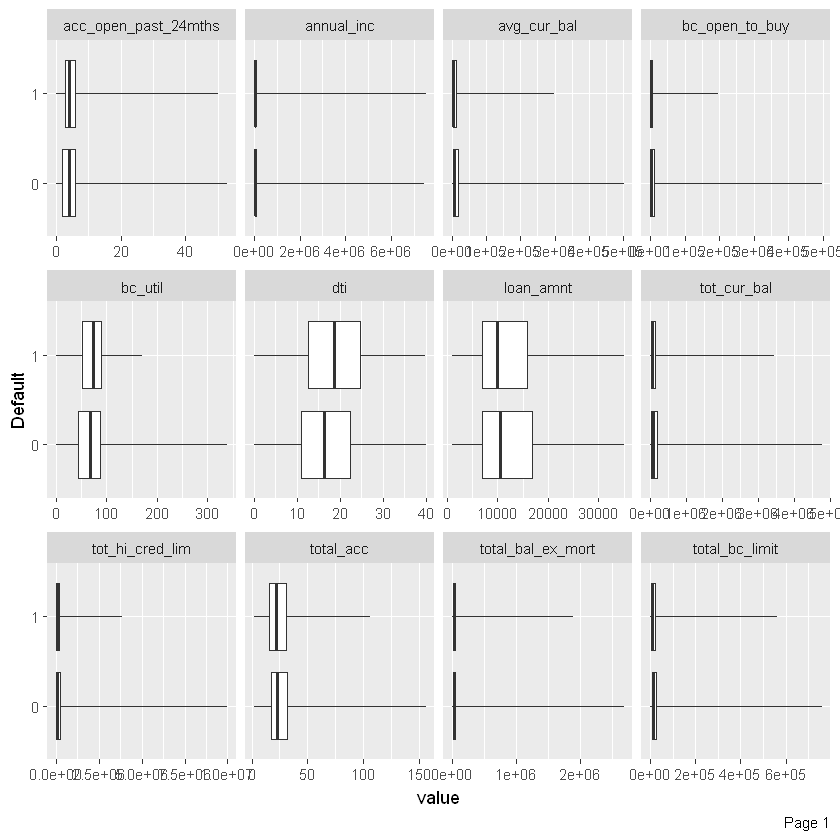

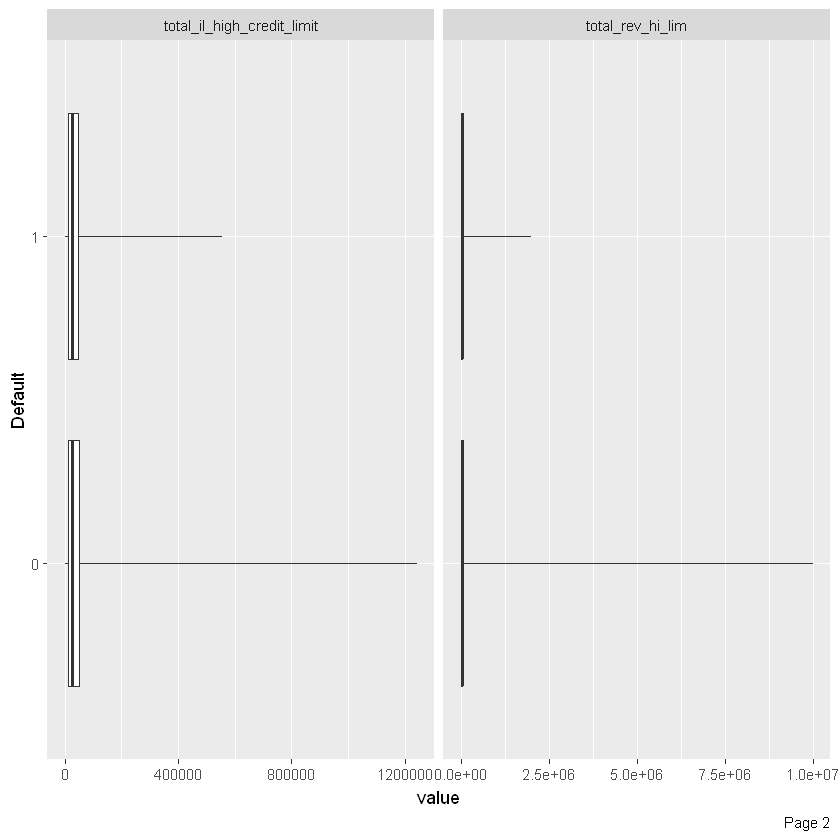

In [15]:
plot_boxplot(data=dataset,by="Default",geom_boxplot_args= list("outlier.size" = -1, "coef" = 1e30))

As you can see from the output above all of our feature variable have been plotted against our Default labels. Note the reason why we observe an error message is due to the formatting of the 'home_ownership' variable ignore these warnings for now. It is evident that our boxplots although numerous, offer little help from an interpretation perspective. Later on we use ggplot to plot these individually for better analysis possibilities.


---


## Plotting with ggplot:


ggplot has a bit of a peculiar syntax so just in case you have not used the library before here a quick rundown on how it works. Although a lot more work than the DataWrangler plots above, ggplot will allow us to have significantly more control over how our plots are visualized and customized to the task at hand.

### ggplot2 Syntax Overview:
- All ggplot2 plots begin with a call to ggplot(), 
- Then, we supply default data and aesthetic mappings, specified by aes()
- Additional calls to different ggplot layer functions are applied together using the plus sign. You then add layers, scales, cords, and facets with +
- The first layer to add usually begins with the prefix 'geom_' and depending on the plot we want we can select from several different types of geometric plots such as 'geom_bar' for bar plots 'geom_line' for timeseries or line plots 
- To see all the potential layer options and plot types check out this website https://ggplot2.tidyverse.org/reference/
- We can also add layers to add a title, custom scale, legend, and just about any other plot feature you can imagine
- To save a plot to disk, we can use ggsave()

### ggplot(data,mapping):

This is our primary function for ggplot plotting which actually does the legwork for initializing the graph object. It will always be the first function call we make. The function takes only two arguments:
- data: Default dataset to use for plot. If not already a data.frame, will be converted to one.
- mapping: Default list of aesthetic mappings to use for plot. If not specified, must be supplied in each layer added to the plot. The mappings will always take the aes() function as in input.

### aes(x,y):

The aes() function stands for aesthetic mappings from our data to a visual representation of it. Think of this function as telling ggplot what our x and y variables are. This function will be set to the mapping used in our ggplot "mapping' argument and adds proper data and axes to our initialized plot. Since we are using the same data frame of data specified under the data argument for the ggplot function we need only provide our desired column name to aes(column_name) to generate the aesthetic mapping. This will also generate our x-axis labels and variable names in the case of plotting a categorical.

Lets apply these two functions alone on our previously used feature 'home_ownership' and see what the output looks like. (Don't worry it is supposed to be blank)


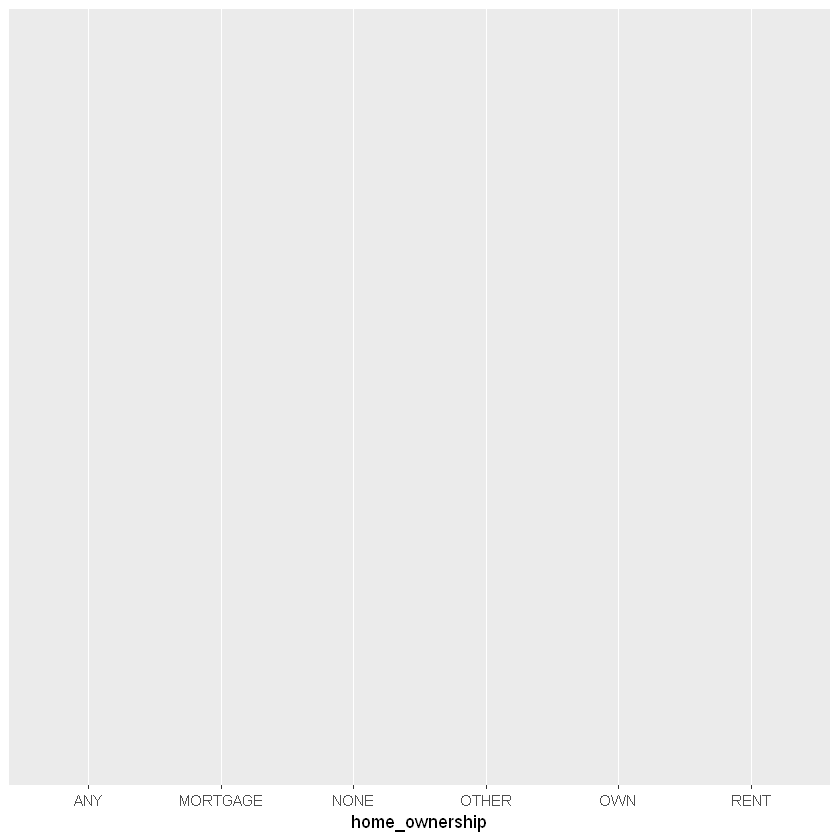

In [16]:
ggplot(data=dataset,mapping=aes(home_ownership))

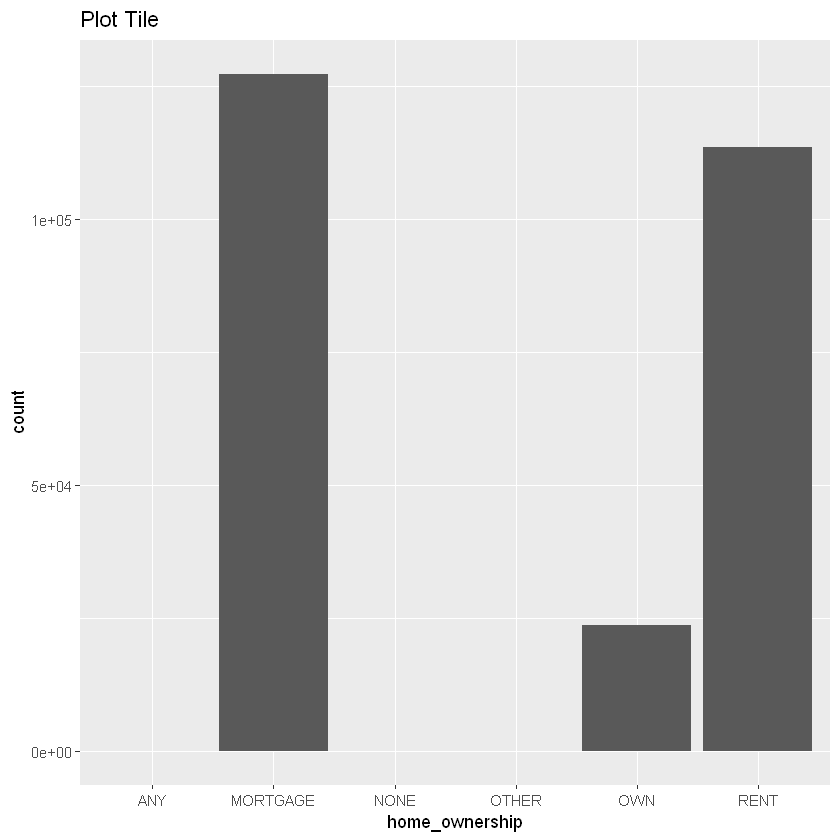

In [17]:
ggplot(data=dataset,mapping=aes(home_ownership)) + geom_bar() + ggtitle('Plot Tile')

### Geom Layers
As we can see above although we do indeed have a graph object displayed it is completely bereft of data. This is because although we have initialized the blank plot with ggplot() and created an aesthetic mapping of our data to a potential visual, we have yet to plot that visual representation of the data. Aes() only create a mapping, it is up to other functions and layers that we add to determine how to visualize that particular mapping. In this way aes() allows us to create one mapping of data that can be subsequently utilized for various different visual representations depending on our needs. So with this in mind we need to add "layer functions" to our existing ggplot statement. These functions can be added to our existing syntax by using the '+' and pipe '%>%' operators. There are tons of choices to choose from for layers so I will provide a few popular ones below, but you can see the full list of possibilities at https://ggplot2.tidyverse.org/reference/index.html.

- geom_bar(): used to create a standard bar plot with rows
- geom_col(): used to create a standard bar plot with columns
- geom_smooth(): used for plotting a smooth series of data on a single line. Typically used with timeseries data.
- geom_boxplot(): used for making box and whisker plots.
- geom_point(): used for creating scatterplots, but with optional arguments can become much more specialcized. 
- geom_histogram(): used for creating column-wise histograms.
- geom_density(): used for creating density estimate plots.
- geom_abline(): used for plotting custom diagonal, horizontal, and even vertical lines. Especially useful for plot annotations. 



### Beyond Geom Layers
Each of these layer functions has their own unique arguments in order to use them to their full potential. We will not go over all of these as it would take far too long. However, among these layer functions there are several arguments that are typically used in all of them the most important of which is the mapping argument which is always specified again with our aes() function mapping.

After adding all our geometric layers, we can teak the finer details of the plot such as titles, scales, themes, and annotations by adding other various types of layers to our function chain. Here is a non-exhaustive list of examples:

- xlab()/ylab(): Add x and y axis labels as string arguments.
- ggtitle(): Add a main plot title as a string argument.
- xlim()/ylim(): Add specified limits on the bounds of the x and y axis using a list of (min,max) as an argument.
- scale_x_log10()/scale_y_log10(): Apply a log base 10 scaling effect on a given axis.
- theme_dark(): Change the display theme and style of the plot.
- coord_polar(): Change the plot to a polar coordinate plot.
- position_stack(): Tell ggplot to stack overlapping object in the plot.

Now that we have a better understanding of the mechanisms behind ggplot, let’s try some different examples of the home_ownership bar chart.


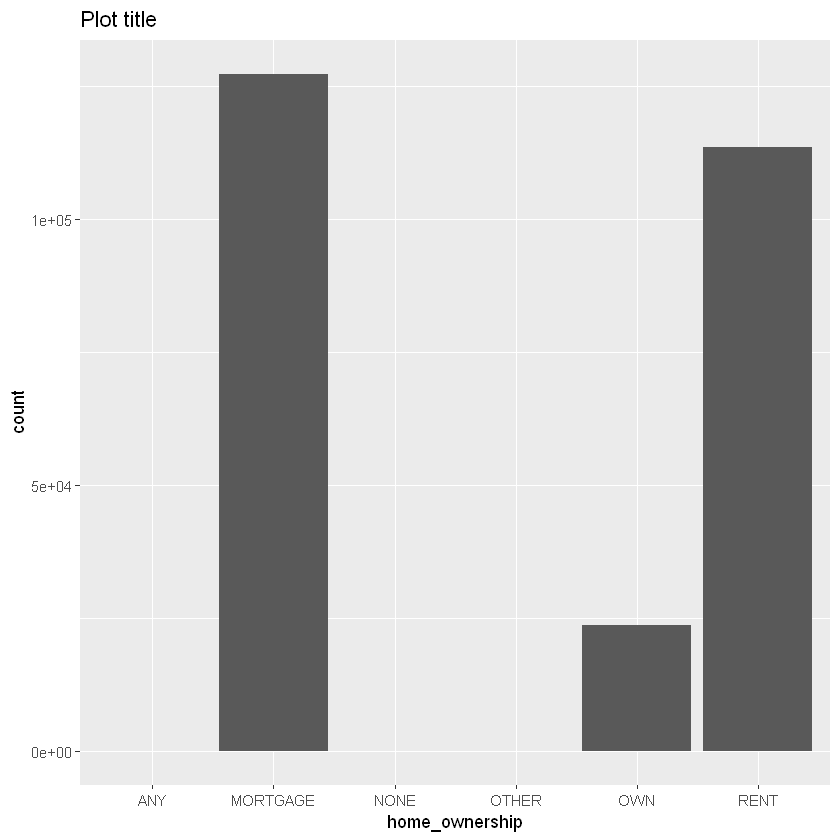

In [18]:
ggplot(data=dataset,aes(home_ownership)) + geom_bar() + ggtitle('Plot title')

Since we didn't add any specific argument to the second aes() call within the geom_bar() function, ggplot inferred based on our datatype of home_ownership that it should yield a frequency plot. Now that we know our base of the plot is the graphing of home_ownership feature frequencies, what would happen if we added a different feature to the aes() call within the geom_bar() function?

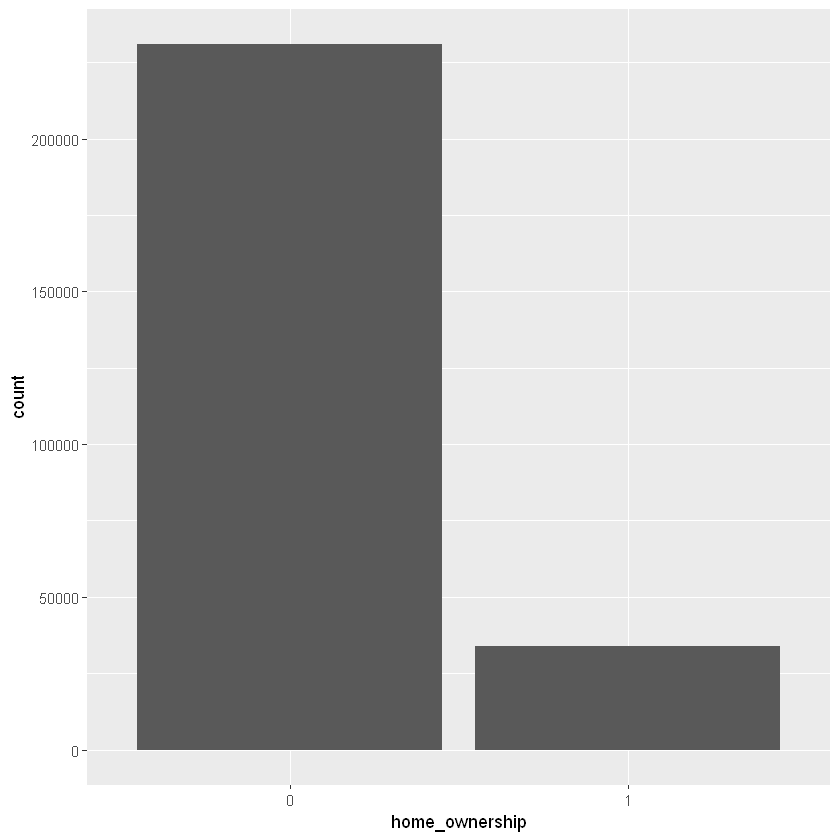

In [19]:
ggplot(data=dataset,aes(home_ownership)) + geom_bar(aes(Default))

By altering the function this way, we have overwritten our aes() mapping of the homeownership feature and replaced it with the frequency mapping for the Default feature. In order to display information about both in a single plot we can use special arguments allowed to the aes() function to keep our frequency plot of homeownership and display meaningful information about Default frequency in the same plot by specifying the fill argument. This argument allows us to add another dimension to our plotting ability by adding color. We can use an aesthetic mapping of Default to fill in the colors of each our homeownership bars. By specifying the fill argument in the aes() function we create different type of aesthetic mapping which will when input to geom_bar() create a different behavior of plotting.

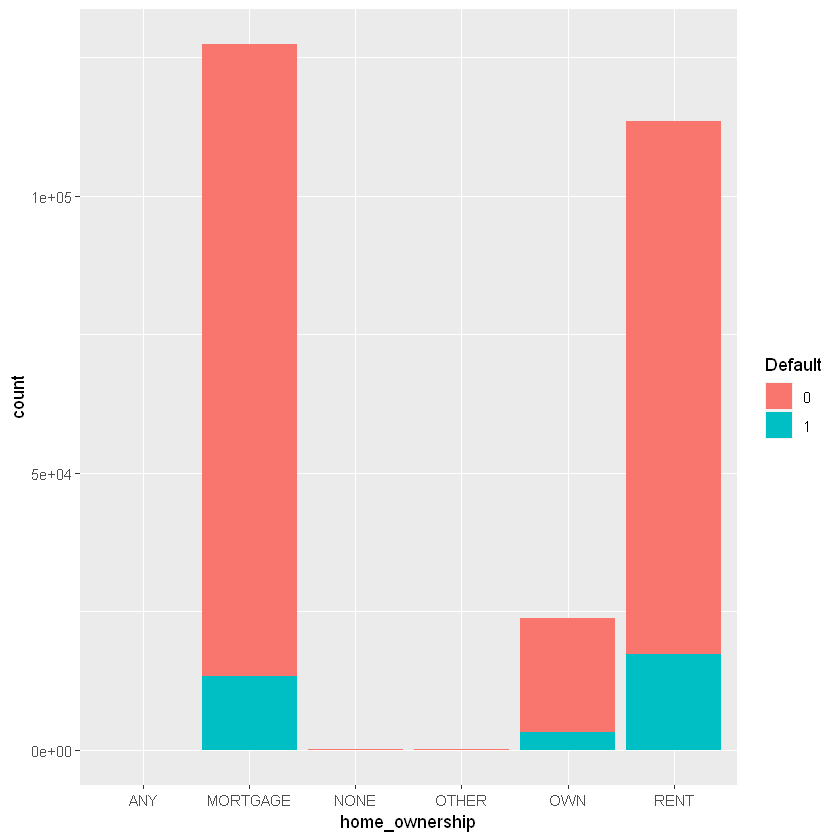

In [20]:
ggplot(data=dataset,aes(home_ownership)) + geom_bar(aes(fill=Default))

---


### ggplot bar plots:

With that introduction out of the way let us move onto inspecting data representations. Looking at the possible values of the column 'home_ownership' it becomes clear we can reduce this variable to only taking on 3 possible values to simply our data representation. By using the DPLYR function 'case_when()' we can create categorical values for each case check and return nans for values that fall outside of our specified cases. When then can remove these nan values using the 'drop_na()' function.


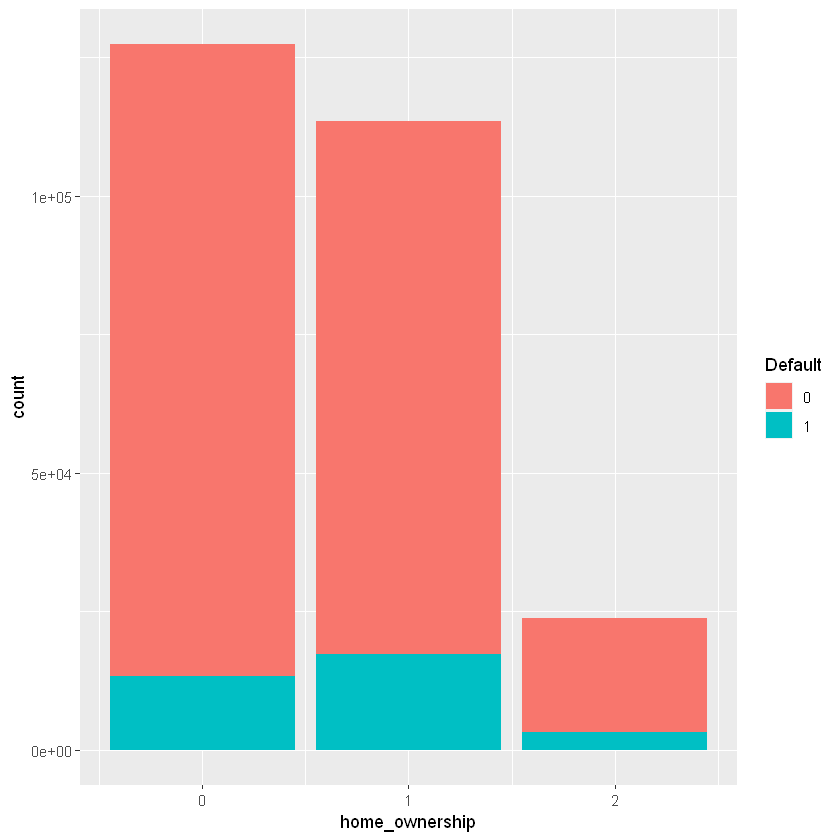

In [21]:
dataset <- dataset%>% mutate(home_ownership=case_when(home_ownership== 'MORTGAGE'~0,home_ownership=='RENT'~1,home_ownership=='OWN'~2))
#uncomment the lines below to print number of missing value before and after the data transformation
#sum(is.na(dataset$home_ownership)) 
dataset2 <-dataset %>% drop_na('home_ownership')
#sum(is.na(dataset2$home_ownership))
ggplot(data=dataset2,aes(home_ownership))+ geom_bar(aes(fill=Default))

As you can see our simplification into just 3 out of the 6 original values of 'home_ownership' has been successful. Since we are dealing with loan data and credit worthiness, it is probably important to better understand the probability of default. To get a good visualization of the number of defaults in our dataset we can use DPLYR functionality to sum the number of default and non-defaulted rows in our dataset, then we can plot these derived features directly with ggplot2.

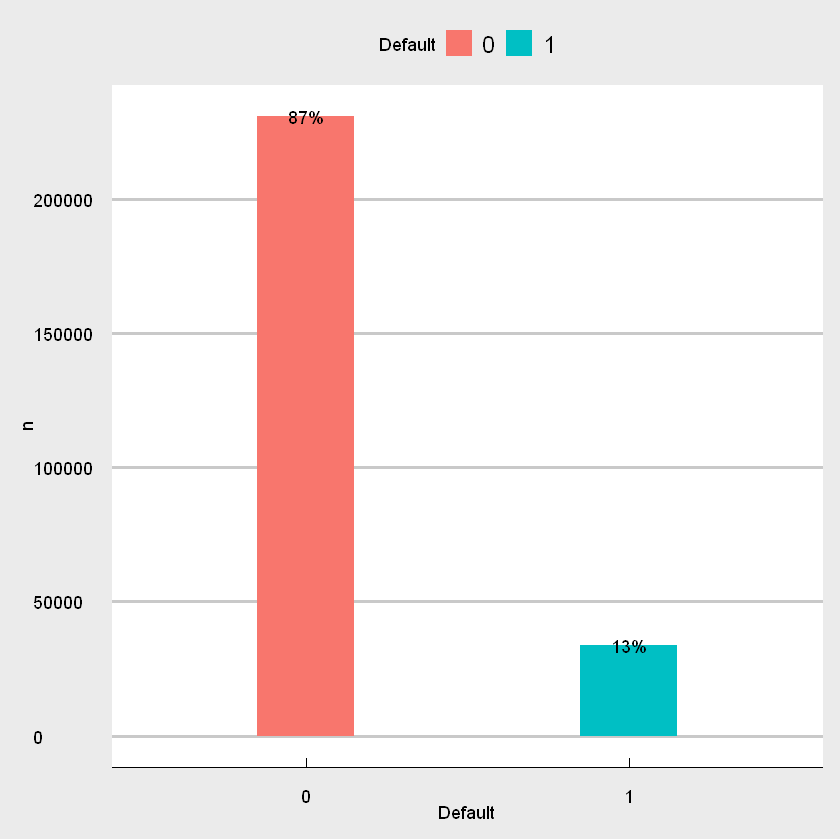

In [22]:
dataset2 %>% count(Default) %>% mutate(total = sum(n),percentage = n/total) %>% 
  ggplot(aes(x = Default, y = n)) +
  geom_col(aes(fill = Default), width = .3) +
  geom_text(aes(label = paste(round(percentage, 2) * 100, "%", sep = "")), nudge_y = 20)+
  theme_economist_white()

Interesting, it seems there are relatively few observations of default when compared to non-defaults.

---

### ggplot box plots:

Next, we can construct boxplots to observe the distribution of continuous variables. It is useful to do this by some grouping. For this case, it is valuable to see the variation of distributions according to whether people defaulted or not. Again, DataExplorer offers us the function plot_boxplot by which we can automatically generate boxplots for all the continuous variables and assign a grouping variable. Although instead we will use the ggplot2 functionality to implement this manually below.

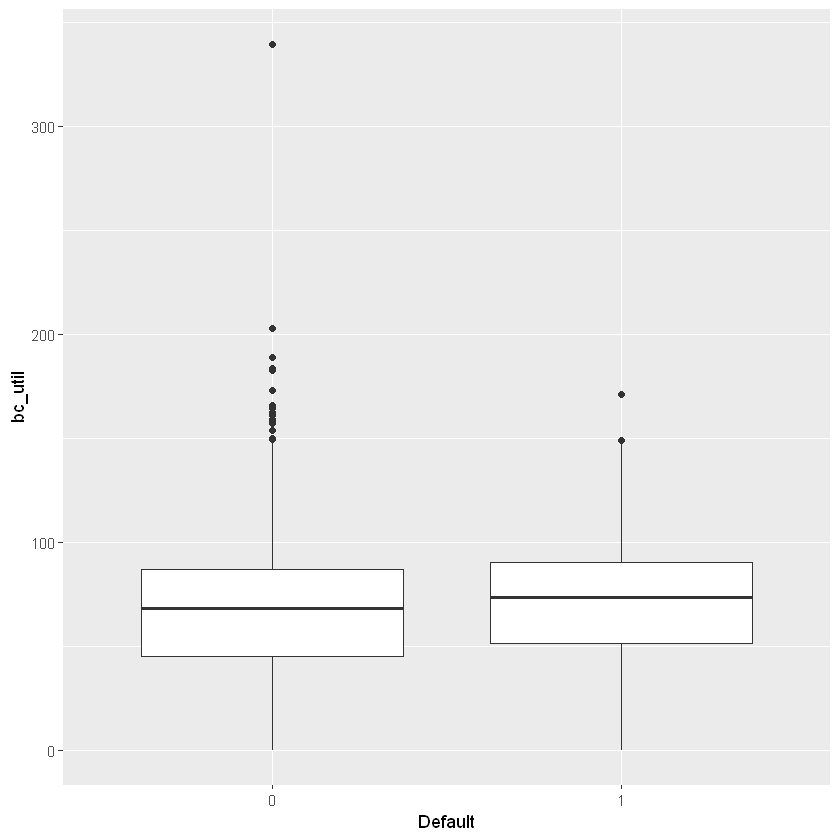

In [23]:
ggplot(dataset2,aes(Default,bc_util)) + geom_boxplot()

---


## WVPlots:
Another good thing to do next is to use a visualization of a correlation matrix plot to get a better idea of how our features relate pairwise to one another. This is an especially great tool for understating and avoid multicollinearity in linear regression models. We can easily do this using the 'PairPlot()' function from the WVPlots package.

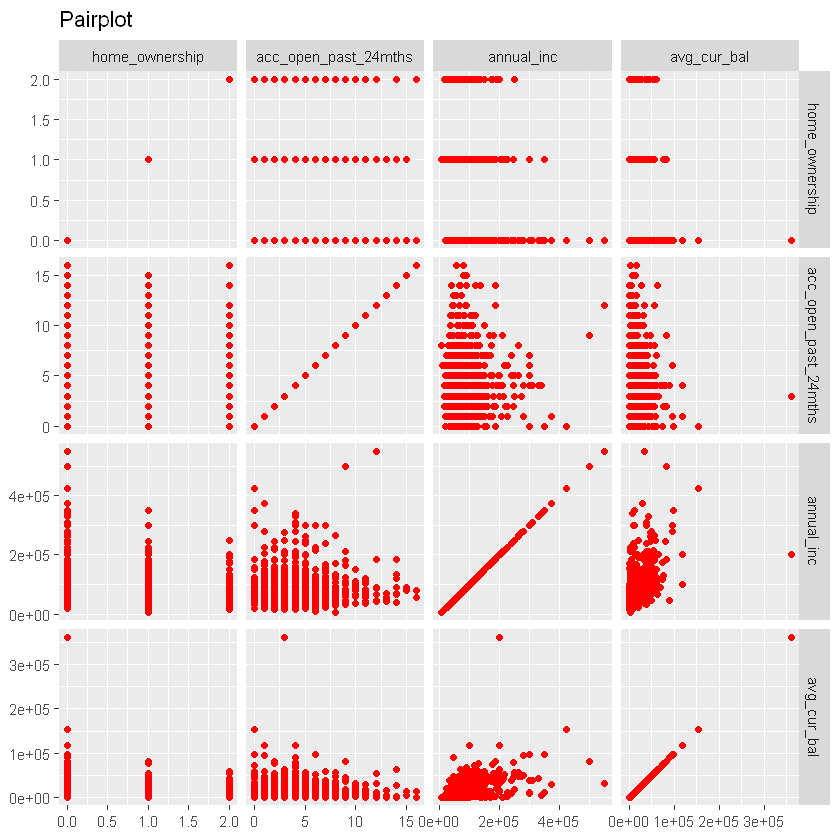

In [24]:
PairPlot(dataset2[1:1000,],colnames(dataset2)[4:7],"Pairplot",point_color = "red")

---


## ggplot Scatterplots:

To get a closer look at a single plot we can create a scatterplot of the two variables in question using ggplot. Let’s try this out using variables 'annual_Inc' and 'loan_amt'.

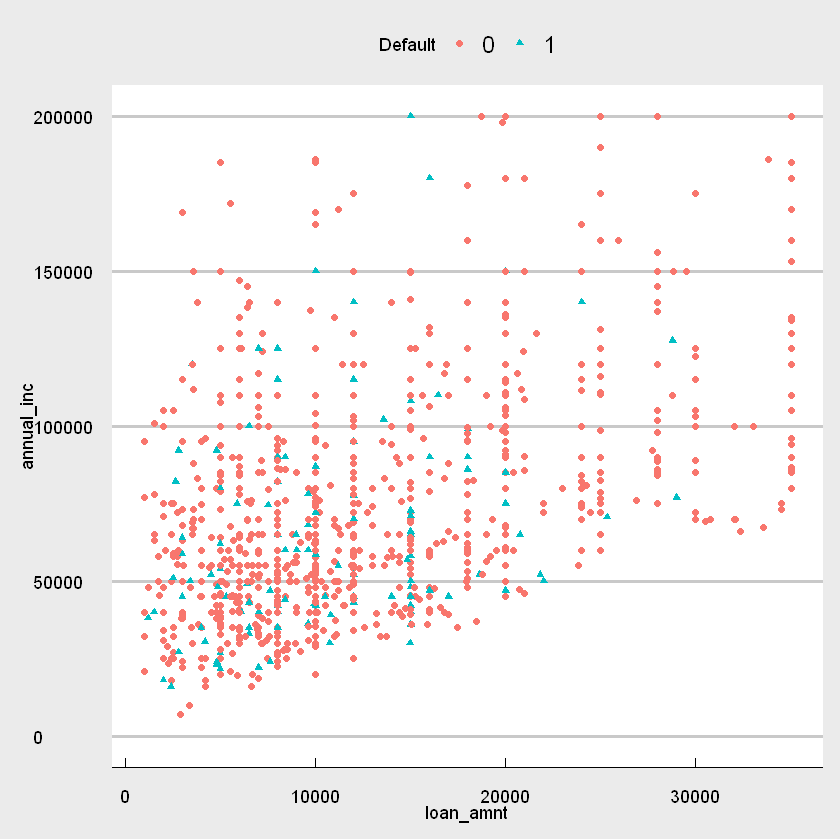

In [25]:
ggplot(dataset2[1:1000,],aes(x=loan_amnt, y=annual_inc,shape=Default,color=Default))+ geom_point(na.rm=TRUE)+theme_economist_white()+ylim(0,2e5)

Let's do this again for the columns 'dti' and 'annual_Inc'.

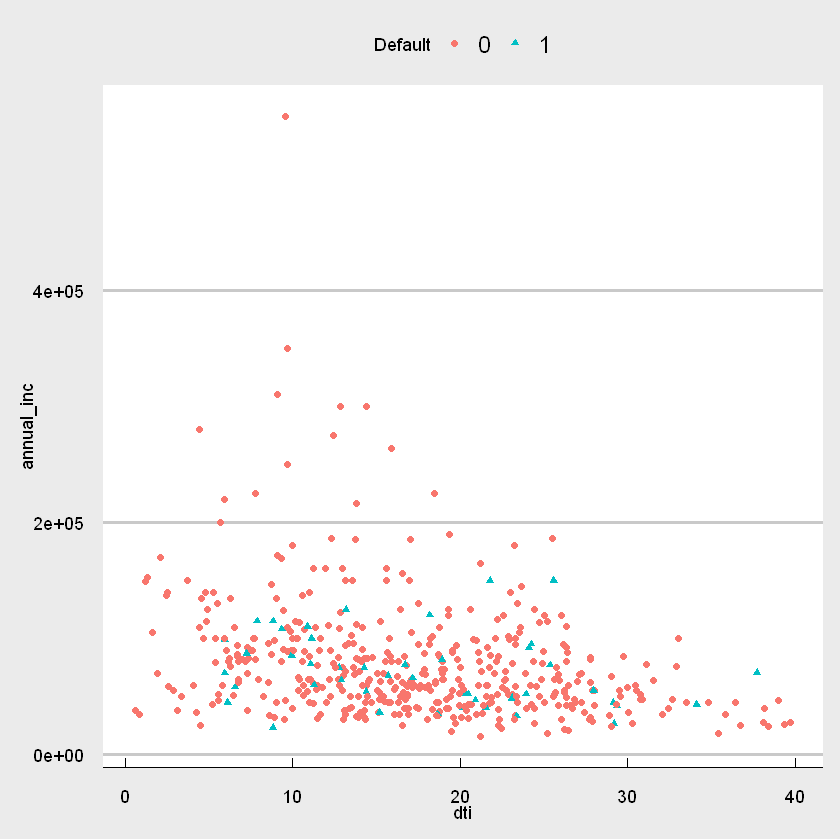

In [26]:
ggplot(dataset[1:500,],aes(x=dti, y=annual_inc,shape=Default,color=Default))+
    geom_point()+
    theme_economist_white()

---

### Correlation Funnel Plots:

Often, we may have datasets with many variables. Using all variables for the model is not always desired, as it creates a significant risk of overfitting and multi-collinearity. This overfitting would then mean the model would have worse out of sample performance than perhaps a simpler model. So, to identify valuable variables, it is often useful to look at their correlations without response variable. One way to neatly evaluate these is to create a 'correlationfunnel()'.The code below, firstly selects only the numeric variables, then creates it into bins and then calculates the correlations based on whether a default occurred or not. Then it plots these correlations.

In [27]:
dataset2 %>%
  mutate_if(is.numeric,as.numeric)%>%
    binarize() %>% #bins the data immediately 
    correlate(Default__1) %>%  #correlate just creates correlations plots 
    plot_correlation_funnel(interactive = TRUE, alpha = 0.7)

HTML widgets cannot be represented in plain text (need html)

## Building the Model:

Now from our view of the above correlation funnel, we will select the top 4 correlated variables and move forward building a model with just them. We will also print the output using our 'summary()' function.

In [28]:
classic_model <- glm(Default ~ annual_inc + bc_open_to_buy + tot_hi_cred_lim + avg_cur_bal, family = "binomial", data = dataset2)
summary(classic_model)


Call:
glm(formula = Default ~ annual_inc + bc_open_to_buy + tot_hi_cred_lim + 
    avg_cur_bal, family = "binomial", data = dataset2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0049  -0.5762  -0.5199  -0.4135   6.6429  

Coefficients:
                  Estimate Std. Error  z value Pr(>|z|)    
(Intercept)     -1.419e+00  1.237e-02 -114.729  < 2e-16 ***
annual_inc      -2.700e-06  1.882e-07  -14.347  < 2e-16 ***
bc_open_to_buy  -2.320e-05  7.024e-07  -33.031  < 2e-16 ***
tot_hi_cred_lim  4.452e-07  8.685e-08    5.126 2.96e-07 ***
avg_cur_bal     -1.935e-05  9.350e-07  -20.692  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 202238  on 264732  degrees of freedom
Residual deviance: 198472  on 264728  degrees of freedom
AIC: 198482

Number of Fisher Scoring iterations: 5


---

## Prediction:

Now that we have a trained model, we will use this model to predict the probability of defaults on some data using the 'predict()' function. Note it is typical to split the data into training and test, but for simplicity, we will simply test on our initial training set. To apply thresholding of these resulting probabilities later, we will store the resulting values in the dataset itself under the new column named 'model_probs'. We then print the result using the 'head()' function.

In [29]:
dataset2$model_prob <- predict(classic_model, dataset2, type = "response")
head(dataset2)

Default loan_amnt emp_length home_ownership acc_open_past_24mths annual_inc
1 0        6400     10+ years  0              5                    69500     
2 0        5000     10+ years  1              6                    84000     
3 0        5000     8 years    0              2                    36000     
4 0       35000     < 1 year   0              1                    85000     
5 0       10000     10+ years  0              2                    75000     
6 0        5700     6 years    1              4                    63000     
  avg_cur_bal bc_open_to_buy bc_util dti   tot_cur_bal tot_hi_cred_lim
1  8925        4425          77.1    13.66 196357      223379         
2  3383        5633          84.5    27.76  64280       77469         
3 14615       18564          65.3    30.03 160767      204100         
4 48028        4583          87.1    18.75 240139      279478         
5 20529        4644          33.7    21.74 143701      213507         
6  1690        3534          60.7    14.53  21972       48508         
  total_acc total_bal_ex_mort total_bc_limit total_il_high_credit_limit
1 36        45990             19300          40279                     
2 34        64280             36400          34969                     
3 22        36867             53500              0                     
4 16        49419             35600          37101                     
5 22        21616              7000          41135                     
6 22        21972              9000          26008                     
  total_rev_hi_lim model_prob
1 24800            0.1439651 
2 42500            0.1409217 
3 69100            0.1053637 
4 35600            0.0717735 
5 11200            0.1159295 
6 22500            0.1567785

---


## Visualizing Predictions:

Now let us define some threshold for our resulting model probability of default, so that we can tune our model's classifier. We can accomplish this using the DPLYR 'case_when()' function which allows us to set a given value of our predictions to be 1 or 0 depending on the value we choose for thresholding. In the case below we will use .17. Next, we plot our model predictions resulting from applying our thresholds to see how many defaults and non-defaults our model predicted.

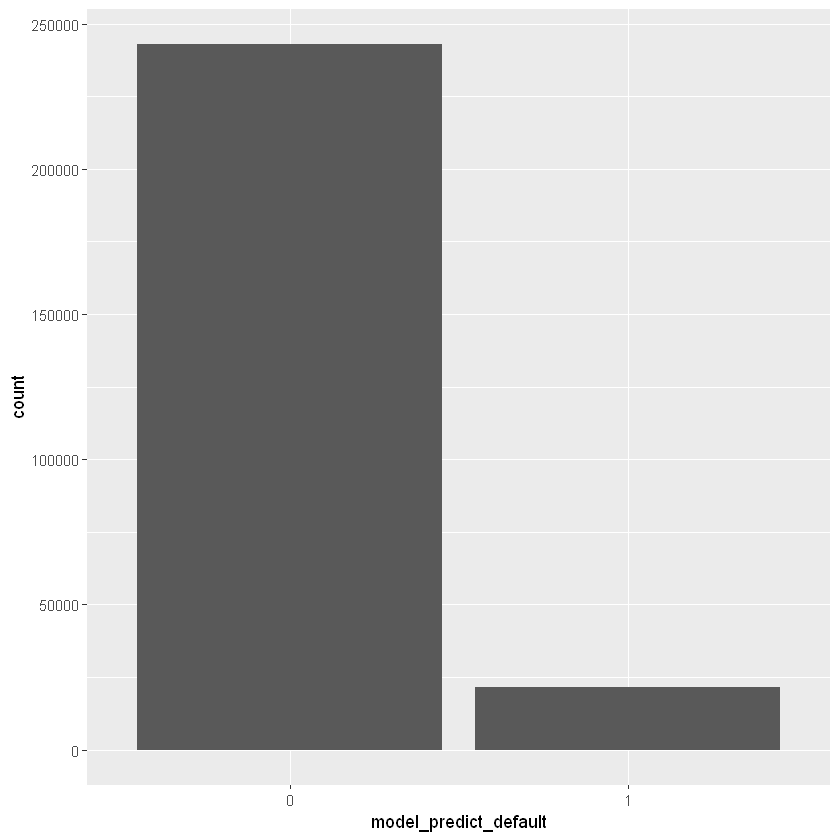

In [30]:
dataset2 <- dataset2 %>%
  mutate(model_predict_default = case_when(model_prob>0.17~1,TRUE~0))

dataset2 <- dataset2 %>% 
  mutate(model_predict_default = as.factor(model_predict_default))

ggplot(data=dataset2) +
  geom_bar(aes(x=model_predict_default))

---

### Visual Error Analysis with Confusion Matrix Plots:

The next key step to applying a model such as logistic regression with a tunable threshold is to understand where and what kind of classification errors our model is making. To visualize this, we use a confusion matrix. The code cell below is a custom implementation of a confusion matrix function. Do not worry if this looks confusing at first glance you will not need to implement anything like this it is just here for example.

In [31]:
draw_confusion_matrix <- function(cm) {

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, '0', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, '1', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, '0', cex=1.2, srt=90)
  text(140, 335, '1', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
} 

With our function defined we now apply it and plot the confusion matrix. As well as the standard printed caret library summary of confusion matrix data using the 'confusionMatrix()' function.

In [32]:
Confusion_mat = caret::confusionMatrix(dataset2$model_predict_default, dataset2$Default,positive='1')
Confusion_mat

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 213563  29464
         1  17367   4339
                                          
               Accuracy : 0.8231          
                 95% CI : (0.8216, 0.8246)
    No Information Rate : 0.8723          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0627          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.12836         
            Specificity : 0.92480         
         Pos Pred Value : 0.19990         
         Neg Pred Value : 0.87876         
             Prevalence : 0.12769         
         Detection Rate : 0.01639         
   Detection Prevalence : 0.08199         
      Balanced Accuracy : 0.52658         
                                          
       'Positive' Class : 1               
            

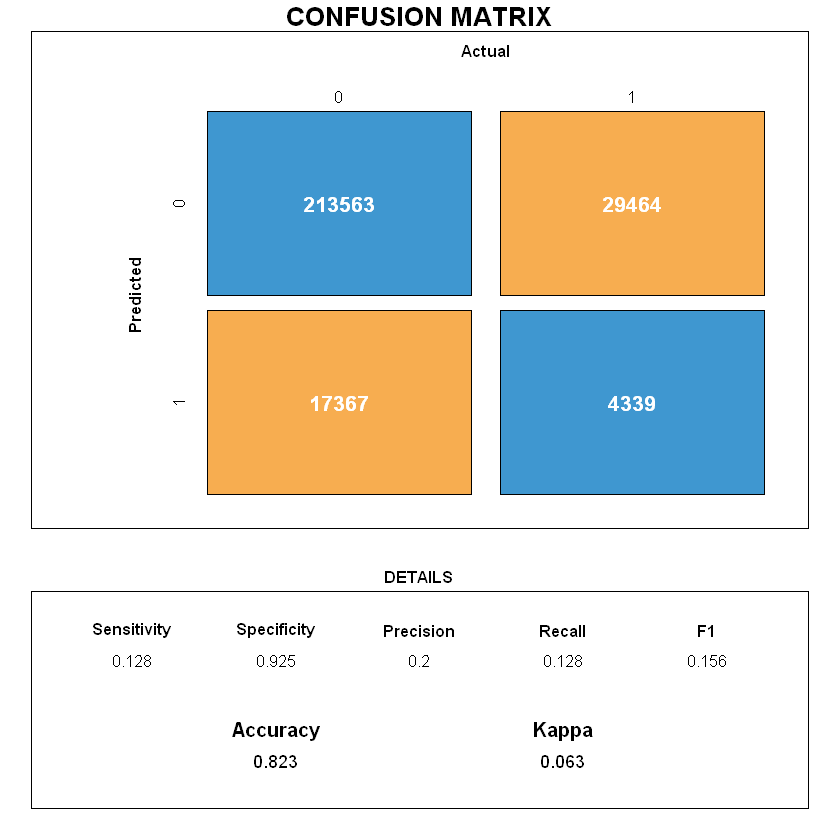

In [33]:
draw_confusion_matrix(Confusion_mat)

---


## Visualizing ROC Curve:
Now we can calculate the AUC, which is often a better measure than accuracy alone, particularly when considering imbalanced data. The ROCR package assists in this. Firstly, we create a prediction object using our model and data not our previously solved for static preidctions. The predicition object will allow the computation of ROC statistics across a spectrum of varying threshold values. Then we created an ROC object from which we could calculate the AUC.

[1] "AUC value for logistic regression:  0.606136848438266"


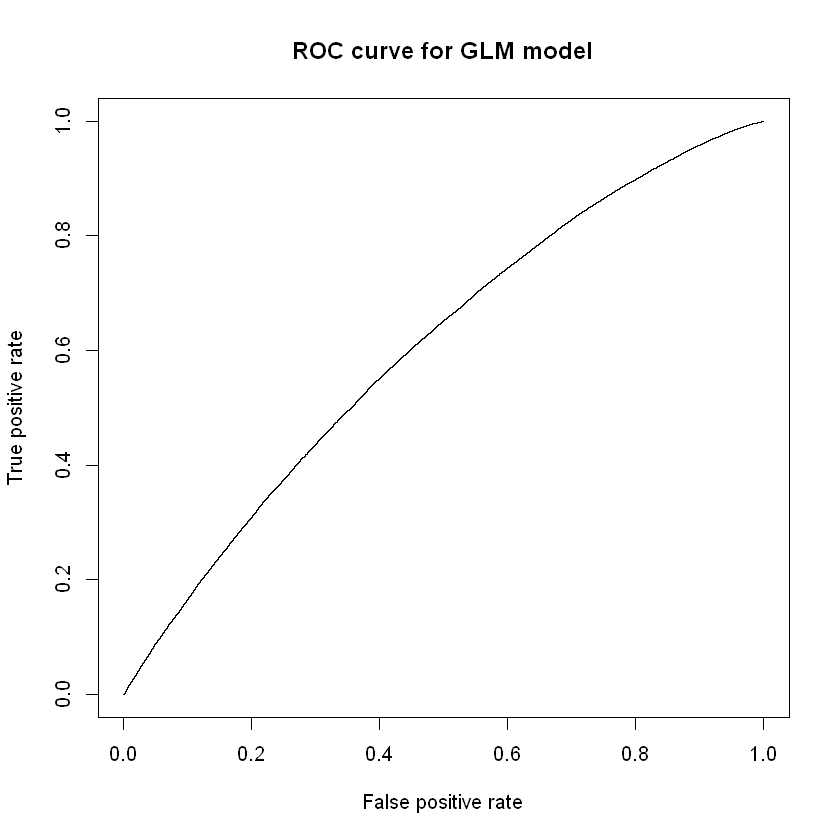

In [34]:
predicts <- prediction(as.numeric(dataset2$model_prob),as.numeric(dataset2$Default))
roc <- performance(predicts,"tpr", "fpr")
plot(roc,main="ROC curve for GLM model")
auc_ROCR <- performance(predicts, measure = "auc")
auc_ROCR <- auc_ROCR@y.values[[1]]
print(paste("AUC value for logistic regression: ",auc_ROCR))